# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
df = pd.read_csv("previsao_de_renda.csv")

# Convertendo a coluna de data para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

## Resposta
> Observando os gráficos, não há mudanças drásticas nas proporções das variáveis `posse_de_imovel` e `posse_de_veiculo` ao longo dos meses. Porém, nota-se uma leve tendência de aumento na proporção de pessoas com posse de veículo, o que pode indicar algum fenômeno econômico ou social a ser investigado, como aumento de crédito ou mudança de perfil socioeconômico da amostra. Ainda assim, as distribuições se mostram relativamente estáveis, sem rupturas bruscas.

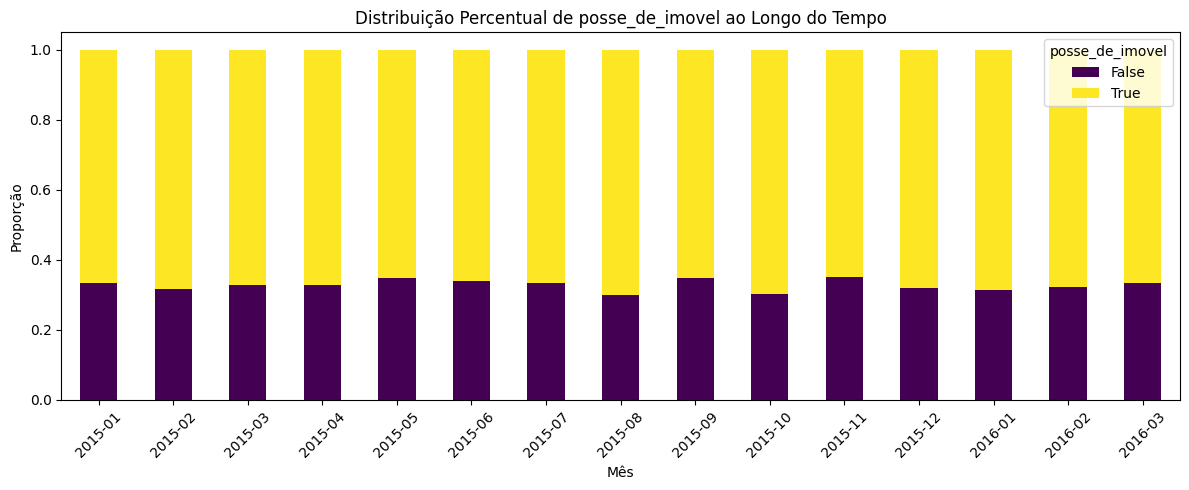

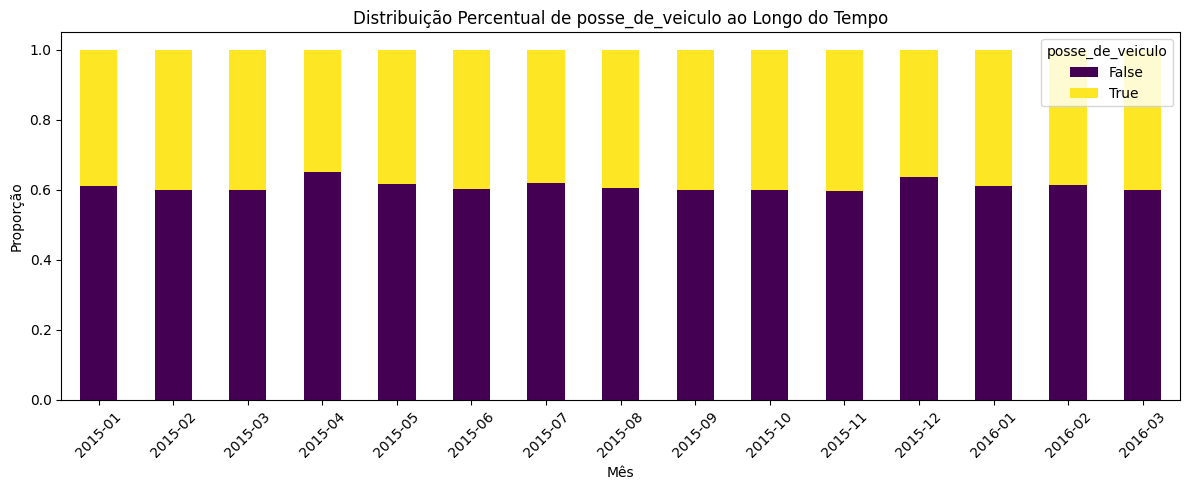

In [2]:
# Variáveis qualitativas que queremos analisar
qual_vars = ['posse_de_imovel', 'posse_de_veiculo']

# Gráficos de barras empilhadas 100% por mês
for var in qual_vars:
    dist = df.groupby([df['data_ref'].dt.to_period("M"), var]).size().unstack().fillna(0)
    dist_percent = dist.div(dist.sum(axis=1), axis=0)  # Convertendo para proporção

    # Plotando o gráfico
    dist_percent.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='viridis')
    plt.title(f'Distribuição Percentual de {var} ao Longo do Tempo')
    plt.xlabel('Mês')
    plt.ylabel('Proporção')
    plt.legend(title=var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

## Resposta
> Ao analisar as médias de renda ao longo do tempo para cada nível das variáveis qualitativas, percebemos que:

- Pessoas com posse de imóvel geralmente têm uma renda média maior do que aquelas que não possuem.

- O mesmo ocorre com a posse de veículo, que está associada a uma renda média mais elevada.

> Além disso, as médias de renda para cada grupo se mantêm relativamente estáveis ao longo do tempo, o que é um ponto positivo para o uso dessas variáveis em uma modelagem.

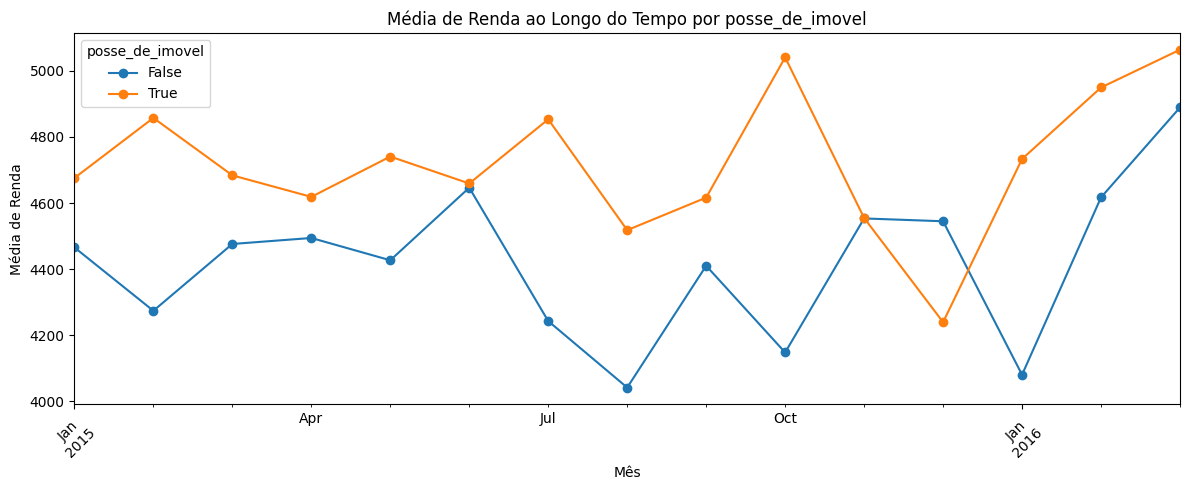

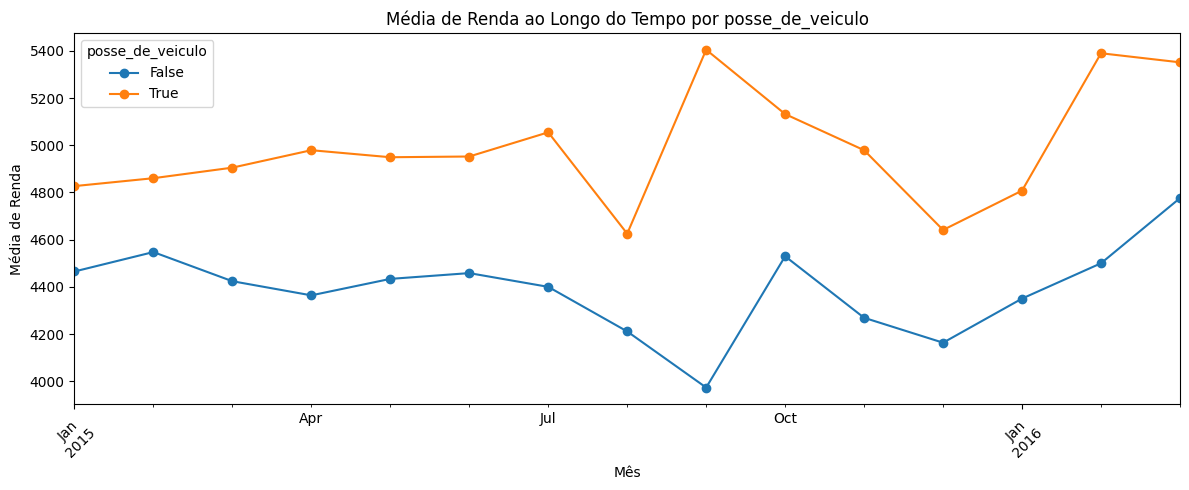

In [3]:
# Gráficos de média de renda por categoria e por mês
for var in qual_vars:
    mean_renda = df.groupby([df['data_ref'].dt.to_period("M"), var])['renda'].mean().unstack()

    mean_renda.plot(figsize=(12, 5), marker='o')
    plt.title(f'Média de Renda ao Longo do Tempo por {var}')
    plt.xlabel('Mês')
    plt.ylabel('Média de Renda')
    plt.legend(title=var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#Conclusão:
>As variáveis qualitativas analisadas (posse de imóvel e de veículo) podem sim ser utilizadas em uma modelagem preditiva de renda, pois apresentam:

- Uma distribuição estável no tempo.

- Uma relação clara com a variável alvo (renda), o que pode ajudar a melhorar a performance do modelo.